## Exploratory of Idasanutlin 24hr expt1 files, preprocessing and clustering

Barcodes, classification, genes and matrix exploring based on <a href="https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html#Preprocessing-and-clustering-3k-PBMCs" target="_blank">Scanpy Preprocessing and clustering tutorial</a>.

Download <a href="https://ndownloader.figshare.com/files/18716351?private_link=139f64b495dea9d88c70" target="_blank">MIX-seq data</a>.

In [1]:
import pandas as pd
import scanpy as sc

In [2]:
barcodes = pd.read_csv('../data/Idasanutlin_24hr_expt1/barcodes.tsv', sep='\t', index_col=None, header=None)

In [3]:
barcodes

,0
0,AAACCTGAGATCCTGT-1
1,AAACCTGAGGATGTAT-1
2,AAACCTGCAGAGCCAA-1
3,AAACCTGCAGCGTCCA-1
4,AAACCTGGTACCTACA-1
...,...
3092,TTTGTCACATACTACG-1
3093,TTTGTCAGTGATGTCT-1
3094,TTTGTCAGTTCACGGC-1
3095,TTTGTCATCAGAGGTG-1


In [4]:
classification = pd.read_csv('../data/Idasanutlin_24hr_expt1/classifications.csv', sep=',', index_col=0, header=0)

In [5]:
classification

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGATCCTGT-1,RERFLCAD1_LUNG,332,0.646542,8.052596,0.384761,6.242505,0.618204,476,0.015654,RERFLCAD1_LUNG,TEN_ENDOMETRIUM,5.600890,0.064639,normal,0.005148,ACH-000791
AAACCTGAGGATGTAT-1,TEN_ENDOMETRIUM,969,0.325894,5.008345,0.137286,3.325183,0.856890,1848,0.035590,TEN_ENDOMETRIUM,LNCAPCLONEFGC_PROSTATE,6.545950,0.138958,doublet,0.999944,ACH-000397
AAACCTGCAGAGCCAA-1,SKMEL2_SKIN,380,0.584808,19.754881,0.477532,18.819931,0.215684,535,0.002803,SKMEL2_SKIN,IALM_LUNG,17.785999,0.070857,normal,0.000021,ACH-001190
AAACCTGCAGCGTCCA-1,RCM1_LARGE_INTESTINE,443,0.700630,7.931822,0.384946,5.845276,0.838428,703,0.004341,RCM1_LARGE_INTESTINE,BT474_BREAST,9.033865,0.078363,normal,0.000022,ACH-000565
AAACCTGGTACCTACA-1,LS1034_LARGE_INTESTINE,396,0.693710,14.381199,0.526298,13.319502,0.158258,624,0.011199,LS1034_LARGE_INTESTINE,TEN_ENDOMETRIUM,5.047666,0.072083,normal,0.000512,ACH-000252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATACTACG-1,SKMEL2_SKIN,694,0.668077,15.004533,0.523540,14.085486,0.018213,1263,0.008663,SKMEL2_SKIN,RERFLCAD1_LUNG,4.642602,0.121956,normal,0.000430,ACH-001190
TTTGTCAGTGATGTCT-1,BICR31_UPPER_AERODIGESTIVE_TRACT,451,0.751153,23.891754,0.616791,22.849948,0.110017,702,0.011369,BICR31_UPPER_AERODIGESTIVE_TRACT,LS1034_LARGE_INTESTINE,6.342580,0.081825,normal,0.000122,ACH-000228
TTTGTCAGTTCACGGC-1,BICR31_UPPER_AERODIGESTIVE_TRACT,383,0.726720,23.588516,0.604668,23.293451,0.022538,560,0.002364,BICR31_UPPER_AERODIGESTIVE_TRACT,IALM_LUNG,2.954189,0.078761,normal,0.000002,ACH-000228


In [6]:
genes = pd.read_csv('../data/Idasanutlin_24hr_expt1/genes.tsv', sep='\t', header=None, index_col=0)

In [7]:
genes

,1
0,
ENSG00000243485,MIR1302-10
ENSG00000237613,FAM138A
ENSG00000186092,OR4F5
ENSG00000238009,RP11-34P13.7
ENSG00000239945,RP11-34P13.8
...,...
ENSG00000215635,AC145205.1
ENSG00000268590,BAGE5
ENSG00000251180,CU459201.1


In [8]:
mtx = pd.read_csv('../data/Idasanutlin_24hr_expt1/matrix.mtx', sep=' ', header=1, index_col=None)

In [9]:
mtx

,32738,3097,8938003
0,41,1,1
1,55,1,1
2,68,1,4
3,69,1,1
4,70,1,1
...,...,...,...
8937998,32703,3097,78
8937999,32704,3097,10
8938000,32706,3097,54
8938001,32707,3097,9


In [10]:
adata = sc.read_10x_mtx('../data/Idasanutlin_24hr_expt1/')

In [11]:
adata

AnnData object with n_obs × n_vars = 3097 × 32738
    var: 'gene_ids'

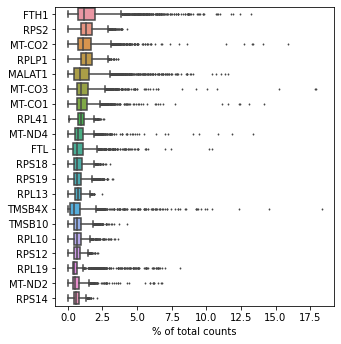

In [12]:
sc.pl.highest_expr_genes(adata, n_top=20,)

## Creating dataframe

In [13]:
adata.strings_to_categoricals()

In [14]:
adata.to_df()

,MIR1302-10,FAM138A,OR4F5,RP11-34P13.7,RP11-34P13.8,AL627309.1,RP11-34P13.14,RP11-34P13.9,AP006222.2,RP4-669L17.10,...,KIR3DL2-1,AL590523.1,CT476828.1,PNRC2-1,SRSF10-1,AC145205.1,BAGE5,CU459201.1,AC002321.2,AC002321.1
AAACCTGAGATCCTGT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGAGGATGTAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGAGCCAA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGCGTCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTACCTACA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACATACTACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTGATGTCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTTCACGGC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCATCAGAGGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Basic filtering, marking mitochondrial genes

Filtering out cells that contain less than 200 detected genes. Filtering out genes that have been detected in less than 3 cells.

In [15]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Annotating the group of mitochondrial genes as 'mt', then filtering out mitochondrial genes.

In [16]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with 

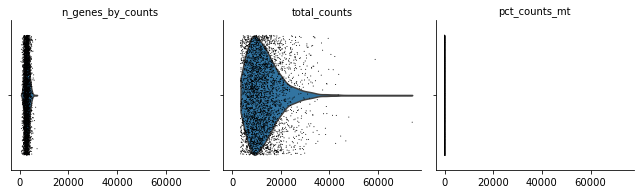

In [17]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

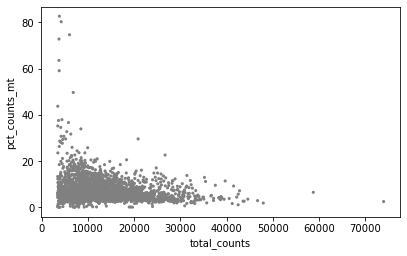

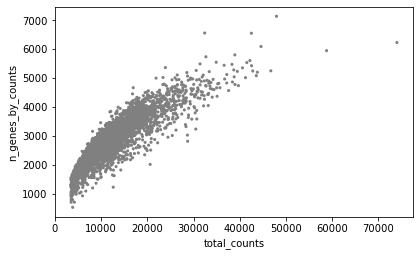

In [18]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Removing cells that contain too many total counts or mithocondrial genes expressed based on the graphs above.

In [19]:
adata = adata[adata.obs.n_genes_by_counts < 5000, :]
adata = adata[adata.obs.pct_counts_mt < 20, :]

Normalizing and logarithmizing.

In [20]:
sc.pp.normalize_total(adata, target_sum=1e4)

/home/ubuntu/anaconda3/envs/mercedesz/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [21]:
sc.pp.log1p(adata)

Identifying and filtering highly-variable genes.

In [22]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

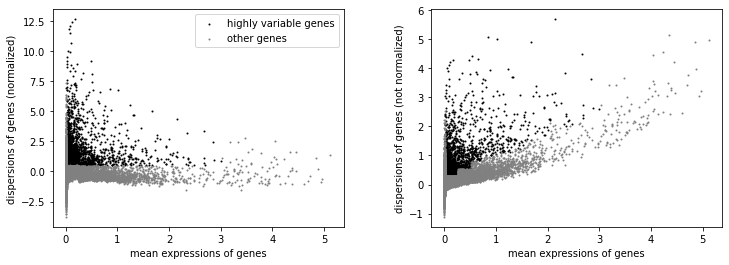

In [23]:
sc.pl.highly_variable_genes(adata)

In [24]:
adata.raw = adata

In [25]:
adata = adata[:, adata.var.highly_variable]  

Regressing out the influence of total counts per cell and the percentage of expressed mitochondrial genes. Scaling and cutting out data greater than standard deviation 10.

In [26]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt']) 

In [27]:
sc.pp.scale(adata, max_value=10) 

## PCA

Running principal component analysis (PCA) to display the main axes of variation and reduce noise in data.

In [30]:
sc.tl.pca(adata, svd_solver='arpack') 

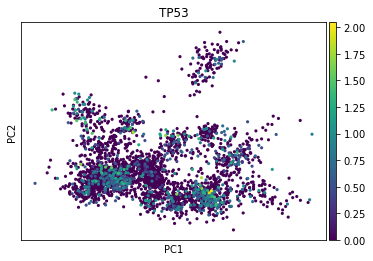

In [31]:
sc.pl.pca(adata, color=['TP53']) 

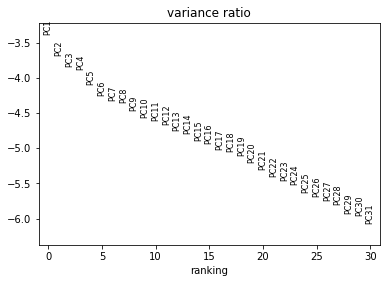

In [33]:
sc.pl.pca_variance_ratio(adata, log=True) 

In [39]:
print(sorted(list(adata.var_names)))

['7SK-2', 'AATF', 'ABCA7', 'ABCB1', 'ABCB5', 'ABCC3', 'ABCC4', 'ABCD1', 'ABHD2', 'ABL2', 'AC002454.1', 'AC003092.1', 'AC006262.5', 'AC007773.2', 'AC011523.2', 'AC017002.1', 'AC018816.3', 'AC020571.3', 'AC073283.4', 'AC074389.9', 'AC079466.1', 'AC090627.1', 'AC092594.1', 'AC093323.3', 'AC096559.1', 'AC098973.2', 'AC104135.3', 'AC104655.3', 'AC110619.2', 'AC137932.1', 'ACACA', 'ACAP1', 'ACSL1', 'ACSL5', 'ACSS1', 'ACTA2', 'ACTG2', 'ADAM19', 'ADAM8', 'ADAMTS1', 'ADAMTS2', 'ADAMTS6', 'ADAMTS7', 'ADAP1', 'ADCY1', 'ADD1', 'ADIRF', 'ADM', 'ADORA1', 'ADRA2A', 'ADRA2C', 'ADRB2', 'AEBP1', 'AEN', 'AF121898.3', 'AFAP1-AS1', 'AGPAT4', 'AGPAT9', 'AGR2', 'AHNAK2', 'AIM1L', 'AJAP1', 'AK5', 'AKAP12', 'AKAP6', 'AKR1B1', 'AKR1B10', 'AKR1C1', 'AKR1C2', 'AKR1C3', 'AL132709.5', 'ALDH1A1', 'ALDH1A3', 'ALDH3A1', 'ALDH3B2', 'ALPK3', 'ALPP', 'AMD1', 'AMDHD1', 'AMIGO2', 'AMZ1', 'ANG', 'ANGPTL2', 'ANGPTL4', 'ANK3', 'ANKH', 'ANKRA2', 'ANKRD1', 'ANKRD10', 'ANKRD28', 'ANKRD45', 'ANLN', 'ANO1', 'ANO9', 'ANPEP', 'ANTXR

Computing neighborhood graph, embedding the graph in two dimensions using <a href="https://arxiv.org/abs/1802.03426" target="_blank">UMAP</a>.

In [35]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [36]:
sc.tl.umap(adata)

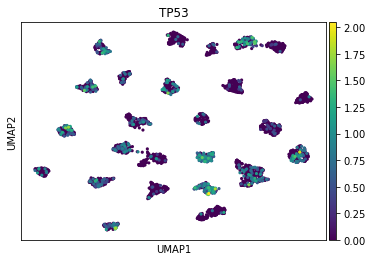

In [37]:
sc.pl.umap(adata, color=['TP53']) 

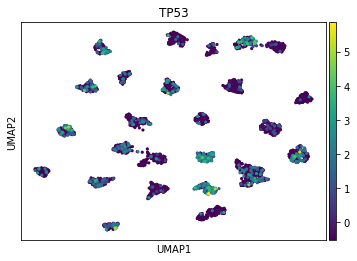

In [38]:
sc.pl.umap(adata, color=['TP53'], use_raw=False) 

## Clustering the neighborhood graph

In [41]:
sc.tl.leiden(adata)

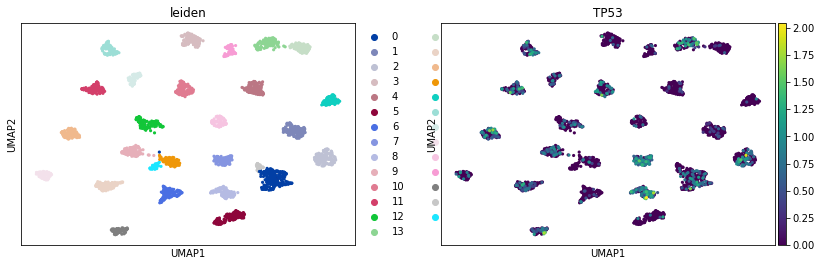

In [42]:
sc.pl.umap(adata, color=['leiden', 'TP53'])

## Cell line annotation

Using **classification.csv** as metadata.

In [43]:
celllines = classification.singlet_ID.tolist()
test_celllist = list(set(celllines))
print(test_celllist)
test_celllist.sort()

['BICR6_UPPER_AERODIGESTIVE_TRACT', 'NCIH226_LUNG', 'IALM_LUNG', 'RCC10RGB_KIDNEY', 'SKMEL3_SKIN', 'BICR31_UPPER_AERODIGESTIVE_TRACT', 'CCFSTTG1_CENTRAL_NERVOUS_SYSTEM', 'RCM1_LARGE_INTESTINE', 'UMUC1_URINARY_TRACT', 'COLO680N_OESOPHAGUS', 'TEN_ENDOMETRIUM', 'DKMG_CENTRAL_NERVOUS_SYSTEM', 'LNCAPCLONEFGC_PROSTATE', 'SNU1079_BILIARY_TRACT', 'CAOV3_OVARY', 'RERFLCAD1_LUNG', 'SH10TC_STOMACH', 'NCIH2347_LUNG', 'SQ1_LUNG', 'BT549_BREAST', 'BT474_BREAST', 'SKMEL2_SKIN', 'COV434_OVARY', 'LS1034_LARGE_INTESTINE']


In [44]:
print(test_celllist)

['BICR31_UPPER_AERODIGESTIVE_TRACT', 'BICR6_UPPER_AERODIGESTIVE_TRACT', 'BT474_BREAST', 'BT549_BREAST', 'CAOV3_OVARY', 'CCFSTTG1_CENTRAL_NERVOUS_SYSTEM', 'COLO680N_OESOPHAGUS', 'COV434_OVARY', 'DKMG_CENTRAL_NERVOUS_SYSTEM', 'IALM_LUNG', 'LNCAPCLONEFGC_PROSTATE', 'LS1034_LARGE_INTESTINE', 'NCIH226_LUNG', 'NCIH2347_LUNG', 'RCC10RGB_KIDNEY', 'RCM1_LARGE_INTESTINE', 'RERFLCAD1_LUNG', 'SH10TC_STOMACH', 'SKMEL2_SKIN', 'SKMEL3_SKIN', 'SNU1079_BILIARY_TRACT', 'SQ1_LUNG', 'TEN_ENDOMETRIUM', 'UMUC1_URINARY_TRACT']


In [45]:
meta = classification

In [46]:
meta.head()

,singlet_ID,num_SNPs,singlet_dev,singlet_dev_z,singlet_margin,singlet_z_margin,doublet_z_margin,tot_reads,doublet_dev_imp,doublet_CL1,doublet_CL2,percent.mito,cell_det_rate,cell_quality,doublet_GMM_prob,DepMap_ID
barcode,,,,,,,,,,,,,,,,
AAACCTGAGATCCTGT-1,RERFLCAD1_LUNG,332,0.646542,8.052596,0.384761,6.242505,0.618204,476,0.015654,RERFLCAD1_LUNG,TEN_ENDOMETRIUM,5.600890,0.064639,normal,0.005148,ACH-000791
AAACCTGAGGATGTAT-1,TEN_ENDOMETRIUM,969,0.325894,5.008345,0.137286,3.325183,0.856890,1848,0.035590,TEN_ENDOMETRIUM,LNCAPCLONEFGC_PROSTATE,6.545950,0.138958,doublet,0.999944,ACH-000397
AAACCTGCAGAGCCAA-1,SKMEL2_SKIN,380,0.584808,19.754881,0.477532,18.819931,0.215684,535,0.002803,SKMEL2_SKIN,IALM_LUNG,17.785999,0.070857,normal,0.000021,ACH-001190
AAACCTGCAGCGTCCA-1,RCM1_LARGE_INTESTINE,443,0.700630,7.931822,0.384946,5.845276,0.838428,703,0.004341,RCM1_LARGE_INTESTINE,BT474_BREAST,9.033865,0.078363,normal,0.000022,ACH-000565
AAACCTGGTACCTACA-1,LS1034_LARGE_INTESTINE,396,0.693710,14.381199,0.526298,13.319502,0.158258,624,0.011199,LS1034_LARGE_INTESTINE,TEN_ENDOMETRIUM,5.047666,0.072083,normal,0.000512,ACH-000252


In [47]:
adata.obs.head()

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden
AAACCTGAGATCCTGT-1,2113,2113,5398.0,302.0,5.594665,10
AAACCTGAGGATGTAT-1,4544,4542,26432.0,1728.0,6.537530,23
AAACCTGCAGAGCCAA-1,2314,2313,7029.0,1250.0,17.783468,5
AAACCTGCAGCGTCCA-1,2564,2564,10054.0,907.0,9.021285,14
AAACCTGGTACCTACA-1,2357,2357,8190.0,413.0,5.042735,13


In [48]:
adata.obs['Cell type'] = meta.loc[adata.obs.index, 'singlet_ID']

In [49]:
adata.obs.head()

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,Cell type
AAACCTGAGATCCTGT-1,2113,2113,5398.0,302.0,5.594665,10,RERFLCAD1_LUNG
AAACCTGAGGATGTAT-1,4544,4542,26432.0,1728.0,6.537530,23,TEN_ENDOMETRIUM
AAACCTGCAGAGCCAA-1,2314,2313,7029.0,1250.0,17.783468,5,SKMEL2_SKIN
AAACCTGCAGCGTCCA-1,2564,2564,10054.0,907.0,9.021285,14,RCM1_LARGE_INTESTINE
AAACCTGGTACCTACA-1,2357,2357,8190.0,413.0,5.042735,13,LS1034_LARGE_INTESTINE


... storing 'Cell type' as categorical


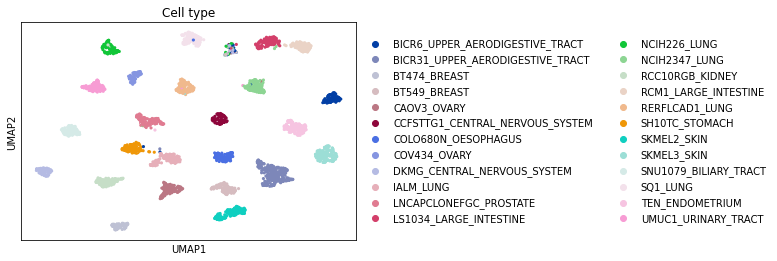

In [50]:
sc.pl.umap(adata, color='Cell type')

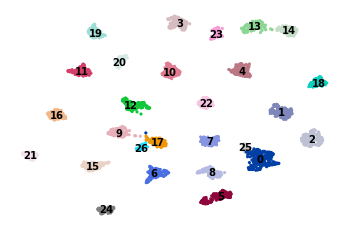

In [51]:
sc.pl.umap(adata, color='leiden', legend_loc='on data', title='', frameon=False, save='.pdf')